In [139]:
import numpy as np
import sys
import json

import matplotlib as mpl
import matplotlib.pyplot as plt

onecol = 3.42
onep5 = 4.5
twocol = 7

ext = ".jpg"

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 8
plt.rcParams['lines.linewidth'] = 1.5

color1 = (.6,.06,.06)
color2 = (.42,.6,.06)
color3 = (.15,.06,.6)

def rec(x):
    return (x + np.abs(x))/2

def resp(f,square = True,simple = False,s = 0):
    ll = len(f)/2
    
    if simple:
        R = rec(f[s::2])**2
    else:
        R = rec(f[::2])**2 + rec(f[1::2])**2 
        
    if square:
        return R
    else:
        return np.sqrt(R)


In [140]:
def get_MGSM_resp_data(data,simple = False,square = True):

    with open(data + "model_params.json", 'r') as fp:
        model_params = json.load(fp)

    print(model_params)
    
    ntrial = model_params["ntrial"]
    n_cos_a = model_params["n_cos_a"]

    con = np.array([.005 * x for x in range(20)] + [.1 + .05*x for x in range(19)])

    print(ntrial)
    
    size_tuning_noisy = np.array([resp(x,simple = simple,square = square) for x in np.loadtxt(data + "size_tuning_noisy.csv")])
    size_tuning_clean = np.array([resp(x,simple = simple,square = square) for x in np.loadtxt(data + "size_tuning_clean.csv")])
    
    print(size_tuning_noisy.shape)
    
    print([5,model_params["ntrial"],len(con),size_tuning_noisy.shape[0]/(5*len(con)*ntrial),4])

#    size_tuning_SP_noisy = np.loadtxt(data + "size_tuning_SP_noisy.csv")
#    size_tuning_SP_clean = np.loadtxt(data + "size_tuning_SP_clean.csv")

    size_tuning_noisy = np.reshape(size_tuning_noisy,[5,model_params["ntrial"],len(con),int(size_tuning_noisy.shape[0]/(5*len(con)*ntrial)),4])
    size_tuning_clean = np.reshape(size_tuning_clean,[5,1,len(con),int(size_tuning_clean.shape[0]/(5*len(con))),4])
    
    ST_n_mean = size_tuning_noisy.mean(axis = 1)
    ST_n_SD = size_tuning_noisy.std(axis = 1)
    
    ST_c_mean = size_tuning_clean.mean(axis = 1)
    ST_c_SD = size_tuning_clean.std(axis = 1)
    #import FF response function
    
    full_field_noisy = np.array([resp(x,simple = simple,square = square) for x in np.loadtxt(data + "full_field_noisy.csv")])
    full_field_clean = np.array([resp(x,simple = simple,square = square) for x in np.loadtxt(data + "full_field_clean.csv")])
    
    full_field_noisy = np.reshape(full_field_noisy,[5,model_params["ntrial"],len(con),4])
    full_field_clean = np.reshape(full_field_clean,[5,1,len(con),4])
    
    FF_n_mean = full_field_noisy.mean(axis = 1)
    FF_n_SD = full_field_noisy.std(axis = 1)
    
    FF_c_mean = full_field_clean.mean(axis = 1)
    FF_c_SD = full_field_clean.std(axis = 1)
    
    surr_supp_noisy = np.array([resp(x,simple = simple,square = square) for x in np.loadtxt(data + "surr_supp_noisy.csv")])
    surr_supp_clean = np.array([resp(x,simple = simple,square = square) for x in np.loadtxt(data + "surr_supp_clean.csv")])
    
#    surr_supp_SP_noisy = np.loadtxt(data + "surr_supp_SP_noisy.csv")
#    surr_supp_SP_clean = np.loadtxt(data + "surr_supp_SP_clean.csv")
    
    surr_supp_noisy = np.reshape(surr_supp_noisy,[5,model_params["ntrial"],5,len(con),2,4])
    surr_supp_clean = np.reshape(surr_supp_clean,[5,1,5,len(con),2,4])

#    surr_supp_SP_noisy = np.reshape(surr_supp_SP_noisy,[5,model_params["ntrial"],5,len(con),2,5]).mean(axis = 1)
#    surr_supp_SP_clean = np.reshape(surr_supp_SP_clean,[5,1,5,len(con),2,5]).mean(axis = 1)
    
    SS_n_mean = surr_supp_noisy.mean(axis = 1)
    SS_n_SD = surr_supp_noisy.std(axis = 1)
    
    SS_c_mean = surr_supp_clean.mean(axis = 1)
    SS_c_SD = surr_supp_clean.std(axis = 1)

    return {"ST_n":ST_n_mean,"ST_c":ST_c_mean,"FF_n":FF_n_mean,"FF_c":FF_c_mean,"SS_n":SS_n_mean,"SS_c":SS_c_mean,"con":100*np.array(con),"params":model_params}

def get_GSM_resp_data(data,simple = False,square = True):

    with open(data + "model_params.json", 'r') as fp:
        model_params = json.load(fp)

    ntrial = model_params["ntrial"]
    n_cos_a = model_params["n_cos_a"]
    
    con = np.array([.005 * x for x in range(20)] + [.1 + .05*x for x in range(19)])

    ind = np.arange(len(con))
    
    FF_COS_noisy = np.array([resp(x,simple = simple,square = square,s = 1) for x in np.loadtxt(data + "full_field_COS_noisy.csv")])
    FF_COS_clean = np.array([resp(x,simple = simple,square = square,s = 1) for x in np.loadtxt(data + "full_field_COS_clean.csv")])
    
    FF_COS_noisy = np.reshape(FF_COS_noisy,[5,model_params["ntrial"],n_cos_a,len(ind),len(ind),3,model_params["nang"]])
    FF_COS_clean = np.reshape(FF_COS_clean,[5,1,n_cos_a,len(ind),len(ind),3,model_params["nang"]])
    
    FFC_n_mean = FF_COS_noisy.mean(axis = 1)
    FFC_n_SD = FF_COS_noisy.std(axis = 1)
    
    FFC_c_mean = FF_COS_clean.mean(axis = 1)
    FFC_c_SD = FF_COS_clean.std(axis = 1)
    
    FFAI_n = FFC_n_mean[:,:,:,:,2]/(FFC_n_mean[:,:,:,:,1] + FFC_n_mean[:,:,:,:,0] + .001)
    FFAI_c = FFC_c_mean[:,:,:,:,2]/(FFC_c_mean[:,:,:,:,1] + FFC_c_mean[:,:,:,:,0] + .001)
    
    FFMI_n = FFC_n_mean[:,:,:,:,2]/(FFC_n_mean[:,:,:,:,0] + .001)
    FFMI_c = FFC_c_mean[:,:,:,:,2]/(FFC_c_mean[:,:,:,:,0] + .001)

    FF_WTA_noisy = np.array([resp(x,simple = simple,square = square) for x in np.loadtxt(data + "full_field_WTA_noisy.csv")])
    FF_WTA_clean = np.array([resp(x,simple = simple,square = square) for x in np.loadtxt(data + "full_field_WTA_clean.csv")])
    
    FF_WTA_noisy = np.reshape(FF_WTA_noisy,[5,model_params["ntrial"],len(con),32,2,model_params['nang']])
    FF_WTA_clean = np.reshape(FF_WTA_clean,[5,1,len(con),32,2,model_params['nang']])
    
    FFW_n_mean = FF_WTA_noisy.mean(axis = 1)
    FFW_n_SD = FF_WTA_noisy.std(axis = 1)
    
    FFW_c_mean = FF_WTA_clean.mean(axis = 1)
    FFW_c_SD = FF_WTA_clean.std(axis = 1)
    
    return {"con":100*np.array(con),"params":model_params,"FFC_n":FFC_n_mean,"FFC_c":FFC_c_mean,"FFMI_n":FFMI_n,"FFMI_c":FFMI_c,"FFAI_n":FFAI_n,"FFAI_c":FFAI_c,"FFW_n":FFW_n_mean,"FFW_c":FFW_c_mean}


In [124]:
dat = get_MGSM_resp_data("./inference/GSMcov/MGSM_16_16/BSDS_16_16_48_8_4_2_16_16False_coen_cagli_False_True/")

{u'scale': 2.5464790894703255, u'fdist': 16, u'ntrial': 1, u'ncor': True, u'fsize': 80, u'n_cos_a': 4, u'nang': 4, u'samd': 16, u'nfilt': 8, u'data': u'BSDS', u'clean': False, u'npha': 2, u'precom': False, u'freq': 16, u'lap': True, u'model': u'coen_cagli'}
1
(3120, 4)
[5, 1, 39, 16, 4]


In [293]:
print(dat["ST_n"].shape)
print(dat["SS_n"].shape)

(50, 1, 40, 2)
(40,)


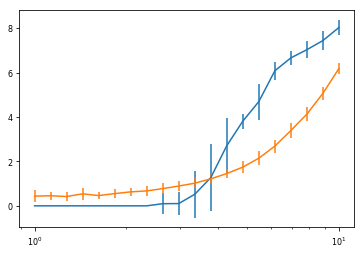

In [19]:
direc = "model_files/MGSM_model_file/"

SS2resp = np.array(utils.fetch_file(direc + "TA_responses_0.5_1_2.0_surround_suppression_1.0.pkl"))
print(SS2resp.shape)

#SS2resp = np.mean(SS2resp,axis = (0,1),keepdims = True)

SS2 = np.sqrt(rect(SS2resp[:,:,:,0])**2 + rect(SS2resp[:,:,:,1])**2)

SS2m = np.mean(SS2,axis = (0,1))
SS2s = np.std(SS2,axis = (0,1))


print(SS2m.shape)
plt.errorbar(np.logspace(0,1,SS2m.shape[0]/2),SS2m[::2],yerr=SS2s[::2])
plt.errorbar(np.logspace(0,1,SS2m.shape[0]/2),SS2m[1::2],yerr=SS2s[1::2])
plt.xscale("log")
plt.show()


(12, 50, 1, 20, 2)
(12, 20)
(50, 1, 40, 2)


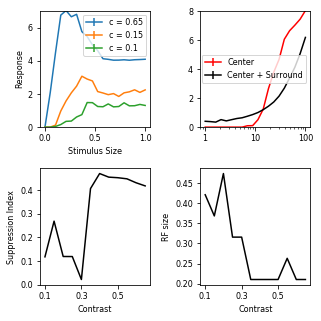

4
(12, 50, 1, 20, 2)
(12, 20)
(50, 1, 40, 2)


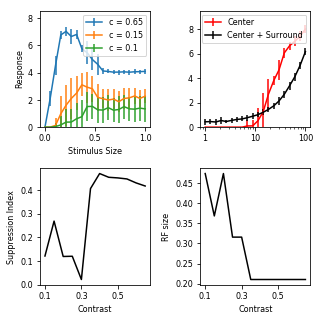

4
(12, 50, 1, 20, 2)
(12, 20)
(50, 1, 40, 2)


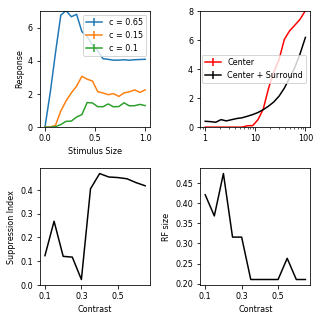

4
(12, 50, 1, 20, 2)
(12, 20)
(50, 1, 40, 2)


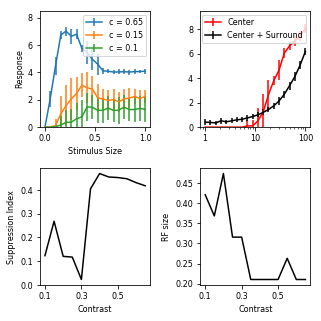

4
(12, 50, 1, 20, 2)
(12, 20)
(50, 1, 40, 2)


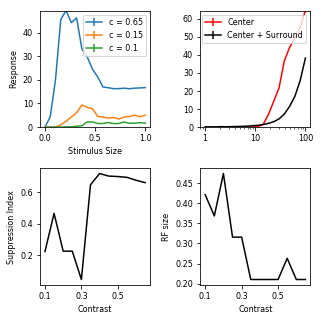

4
(12, 50, 1, 20, 2)
(12, 20)
(50, 1, 40, 2)


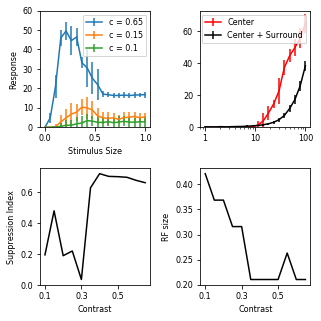

4
(12, 50, 1, 20, 2)
(12, 20)
(50, 1, 40, 2)


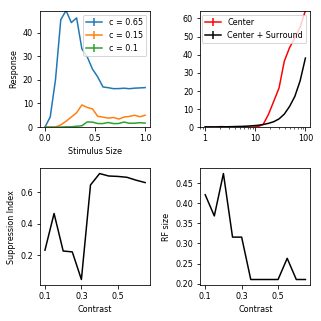

4
(12, 50, 1, 20, 2)
(12, 20)
(50, 1, 40, 2)


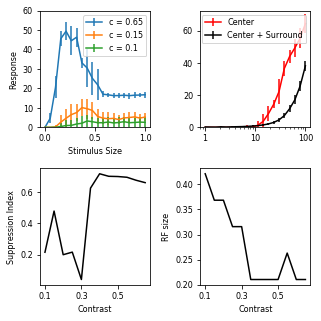

4


In [36]:
for SQRT in [True,False]:
    for COMP in [True,False]:
        for MEAN_FIRST in [True,False]:

            c = ["0.65","0.6","0.55","0.5","0.45","0.4","0.35","0.3","0.25","0.2","0.15","0.1"]#["0.1","0.2","0.3"]#,"0.4","0.6"]#["0.7","0.6","0.5","0.4","0.3","0.2","0.1"]#
            direc = "model_files/MGSM_model_file/"

            SSresp = np.array([np.array(utils.fetch_file(direc + "TA_responses_{}_1_2.0_size_tuning_1.0.pkl".format(k)))[:50] for k in c])
            print(SSresp.shape)

            def get_var_resp(X,rax,mean_ax,srt,comp,mean_first):

                if mean_first:
                    X = np.mean(X,axis = mean_ax,keepdims = True)

                SSresp = rect(np.take(X,0,rax))**2 + comp*rect(np.take(X,1,rax))**2
                if srt: 
                    SSresp = np.sqrt(SSresp)
                SSm = np.mean(SSresp,axis = mean_ax)
                SSs = np.std(SSresp,axis = mean_ax)

                return SSm, SSs

            #SSresp = np.sqrt(rect(SSresp[:,:,:,:,0])**2 + rect(SSresp[:,:,:,:,1])**2)
            #SSm = np.mean(SSresp,axis = (1,2))
            #SSs = np.std(SSresp,axis = (1,2))

            SSm, SSs = get_var_resp(SSresp,-1,(1,2),srt = SQRT,comp = COMP,mean_first = MEAN_FIRST)
            print(SSm.shape)

            SS2resp = np.array(utils.fetch_file(direc + "TA_responses_0.5_1_2.0_surround_suppression_1.0.pkl"))
            print(SS2resp.shape)

            SS2 = np.sqrt(rect(SS2resp[:,:,:,0])**2 + rect(SS2resp[:,:,:,1])**2)
            SS2m = np.mean(SS2,axis = (0,1))
            SS2s = np.std(SS2,axis = (0,1))

            SS2m,SS2s = get_var_resp(SS2resp,-1,(0,1),srt = SQRT,comp = COMP,mean_first = MEAN_FIRST)

            fig,sub = plt.subplots(2,2,figsize = (onep5,onep5))

            subf = sub[0,0]
            subf.errorbar(np.linspace(0,1,20),SSm[0],yerr = SSs[0],label="c = {}".format(c[0]))
            subf.errorbar(np.linspace(0,1,20),SSm[10],yerr = SSs[10],label="c = {}".format(c[10]))
            #subf.errorbar(np.linspace(0,1,20),SSm[10],yerr = SSs[10])
            subf.errorbar(np.linspace(0,1,20),SSm[-1],yerr = SSs[-1],label="c = {}".format(c[-1]))
            subf.set_ylim([0,np.max(SSm) + np.max(SSs)])
            subf.set_xlabel("Stimulus Size")
            subf.set_ylabel("Response")
            subf.legend()

            subf = sub[0,1]
            subf.errorbar(np.logspace(0,2,SS2m.shape[0]/2),SS2m[::2],yerr=SS2s[::2],color=(1,0,0),label = "Center")
            subf.errorbar(np.logspace(0,2,SS2m.shape[0]/2),SS2m[1::2],yerr=SS2s[1::2],color=(0,0,0),label = "Center + Surround")
            subf.set_xscale("log")
            subf.set_xticks([1,10,100])
            subf.set_xticklabels(["1","10","100"])
            subf.set_ylim([0,np.max(SS2m) + np.max(SS2s)])
            subf.legend()

            def SI(x):
                return 1. - (x[-1]/np.max(x))

            subf = sub[1,0]
            subf.plot(np.arange(len(SSm)),[SI(SSm[-k]) for k in range(1,len(SSm)+1)],"k")
            subf.set_xticks(np.arange(len(SSm))[::4])
            subf.set_xticklabels(c[::-4])
            subf.set_xlabel("Contrast")
            subf.set_ylabel("Suppression Index")

            subf = sub[1,1]
            subf.plot(np.arange(len(SSm)),[np.linspace(0,1,20)[np.argmax(SSm[-k])] for k in range(1,len(SSm)+1)],"k")
            subf.set_xticks(np.arange(len(SSm))[::4])
            subf.set_xticklabels(c[::-4])
            subf.set_xlabel("Contrast")
            subf.set_ylabel("RF size")
            plt.tight_layout()

            plt.savefig("./nMGSM_Figures/noisy_MGSM_Fig_sqrt:{}_comp:{}_meanfirst:{}.pdf".format(SQRT,COMP,MEAN_FIRST),bbox_inches = "tight")

            plt.show()

            print(np.argmax(SSm[-0]))

In [52]:
def SI(x):
    return 1. - (x[-1]/np.max(x))

def SI_curve(x):
    return [SI(a) for a in x]


{u'scale': 2.5464790894703255, u'fdist': 16, u'ntrial': 1, u'ncor': True, u'fsize': 80, u'n_cos_a': 4, u'nang': 4, u'samd': 16, u'nfilt': 8, u'data': u'BSDS', u'clean': False, u'npha': 2, u'precom': False, u'freq': 16, u'lap': True, u'model': u'coen_cagli'}
1
(3120, 4)
[5, 1, 39, 16, 4]


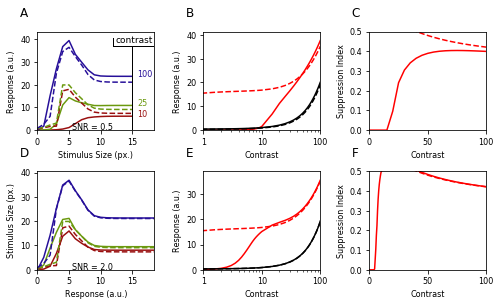

{u'scale': 2.5464790894703255, u'fdist': 16, u'ntrial': 1, u'ncor': True, u'fsize': 80, u'n_cos_a': 4, u'nang': 4, u'samd': 16, u'nfilt': 8, u'data': u'BSDS', u'clean': False, u'npha': 2, u'precom': False, u'freq': 16, u'lap': True, u'model': u'coen_cagli'}
1
(3120, 4)
[5, 1, 39, 16, 4]


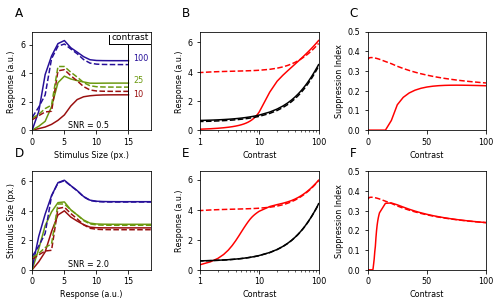

{u'scale': 2.5464790894703255, u'fdist': 16, u'ntrial': 1, u'ncor': True, u'fsize': 80, u'n_cos_a': 4, u'nang': 4, u'samd': 16, u'nfilt': 8, u'data': u'BSDS', u'clean': False, u'npha': 2, u'precom': False, u'freq': 16, u'lap': True, u'model': u'coen_cagli'}
1
(3120, 4)
[5, 1, 39, 16, 4]


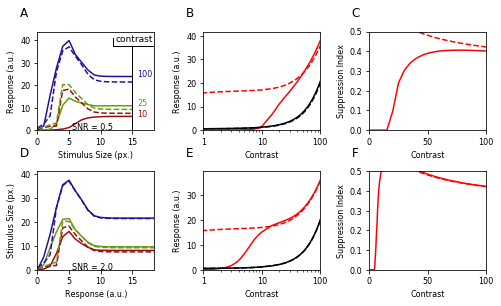

{u'scale': 2.5464790894703255, u'fdist': 16, u'ntrial': 1, u'ncor': True, u'fsize': 80, u'n_cos_a': 4, u'nang': 4, u'samd': 16, u'nfilt': 8, u'data': u'BSDS', u'clean': False, u'npha': 2, u'precom': False, u'freq': 16, u'lap': True, u'model': u'coen_cagli'}
1
(3120, 4)
[5, 1, 39, 16, 4]


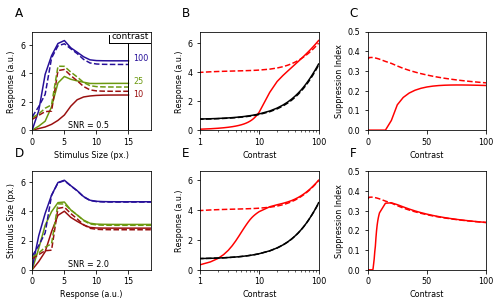

In [60]:
for simple in [True,False]:
    for square in [True,False]:
        dat = get_MGSM_resp_data("./inference/GSMcov/MGSM_16_16/BSDS_16_16_48_8_4_2_16_16False_coen_cagli_False_True/",simple = simple,square = square)

        fig,sub = plt.subplots(2,3,figsize = (twocol,twocol*2/3))
        from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

        sub = np.array([sub[1],sub[0]])

        def ex(x):
            return np.concatenate([x,x[-1:]])


        #High SNR ST
        sub[0,0].plot(range(len(dat["ST_n"][1,20,:,0])) + [20],ex(dat["ST_n"][1,20,:,0]),color=color1,label = "c = {}%".format(dat["con"][20]))
        sub[0,0].plot(range(len(dat["ST_n"][1,20,:,0])) + [20],ex(dat["ST_n"][1,23,:,0]),color=color2,label = "c = {}%".format(dat["con"][30]))
        sub[0,0].plot(range(len(dat["ST_n"][1,20,:,0])) + [20],ex(dat["ST_n"][1,38,:,0]),color=color3,label = "c = {}%".format(dat["con"][38]))

        sub[0,0].plot(range(len(dat["ST_n"][1,20,:,0])) + [20],ex(dat["ST_c"][1,20,:,0]),"--",color=color1)
        sub[0,0].plot(range(len(dat["ST_n"][1,20,:,0])) + [20],ex(dat["ST_c"][1,23,:,0]),"--",color=color2)
        sub[0,0].plot(range(len(dat["ST_n"][1,20,:,0])) + [20],ex(dat["ST_c"][1,38,:,0]),"--",color=color3)

        #sub[0,0].set_xlabel("Stim. Size (px.)")
        #sub[0,0].set_ylabel("Response (a.u.)")

        pmax = np.max(dat["ST_n"][1,:,:,0])
        
        sub[0,0].set_ylim([0,1.1*pmax])#7])
        sub[0,0].set_xlim([0,18.5])
        sub[0,0].text(-.15, 1.15, "D", fontsize=12, transform=sub[0,0].transAxes)
        sub[0,0].text(5.5,.2,"SNR = {}".format(2.0),fontsize = 8)
        sub[0,0].set_ylabel("Stimulus Size (px.)")
        sub[0,0].set_xlabel("Response (a.u.)")


        #Low SNR ST
        sub[1,0].plot(dat["ST_n"][3,20,:,0],color=color1)
        sub[1,0].plot(dat["ST_n"][3,23,:,0],color=color2)
        sub[1,0].plot(dat["ST_n"][3,38,:,0],color=color3)

        sub[1,0].plot(dat["ST_c"][3,20,:,0],"--",color=color1)
        sub[1,0].plot(dat["ST_c"][3,23,:,0],"--",color=color2)
        sub[1,0].plot(dat["ST_c"][3,38,:,0],"--",color=color3)

        sub[1,0].text(12.4,1.05*pmax,"contrast",fontsize = 9)#6.2 instead of pmax

        sub[1,0].plot([15,15],[0,pmax],"k",linewidth = 1)
        sub[1,0].plot([12,18.5],[pmax,pmax],"k",linewidth = 1)
        sub[1,0].plot([12,12],[pmax,1.1*pmax],"k",linewidth = 1)

        sub[1,0].text(15.75,dat["ST_n"][3,38,-1,0],str(int(dat["con"][38])),fontsize = 8,color = color3)
        sub[1,0].text(15.75,dat["ST_n"][3,23,-1,0],str(int(dat["con"][23])),fontsize = 8,color = color2)
        sub[1,0].text(15.75,dat["ST_n"][3,20,-1,0]-.1,str(int(dat["con"][20])),fontsize = 8,color = color1)
        sub[1,0].text(5.5,.2,"SNR = {}".format(0.5),fontsize = 8)

        #sub[1,0].set_xlabel("Stim. Size (px.)")
        #sub[1,0].set_ylabel("Response (a.u.)")
        sub[1,0].set_ylim([0,1.1*np.max(dat["ST_n"][3,:,:,0])])#7])
        sub[1,0].set_xlim([0,18.5])
        sub[1,0].text(-.15, 1.15, "A", fontsize=12, transform=sub[1,0].transAxes)
        sub[1,0].set_xlabel("Stimulus Size (px.)")
        sub[1,0].set_ylabel("Response (a.u.)")

        #High SNR SS
        
        pmax = np.max(dat["SS_n"][1,:,:,0,0])
        sub[0,1].semilogx(dat["con"],dat["SS_n"][1,2,:,0,0],color = "r", label = "s = 0")
        sub[0,1].semilogx(dat["con"],dat["SS_n"][1,2,:,1,0],"k", label = "s = 50")
        sub[0,1].semilogx(dat["con"],dat["SS_c"][1,2,:,0,0],"--",color="r")
        sub[0,1].semilogx(dat["con"],dat["SS_c"][1,2,:,1,0],"k--")
        #sub[0,1].set_xlabel("Contrast")
        #sub[0,1].set_ylabel("Response (a.u.)")
        sub[0,1].set_ylim([0,pmax*1.1])
        sub[0,1].set_xlim([1,100])
        sub[0,1].set_xticks([1,10,100])
        sub[0,1].text(-.15, 1.15, "E", fontsize=12, transform=sub[0,1].transAxes)
        sub[0,1].set_xlabel("Contrast")
        sub[0,1].set_ylabel("Response (a.u.)")
        sub[0,1].get_xaxis().set_major_formatter(FormatStrFormatter('%.0f'))#.set_scientific(False)

        #Low SNR SS
        pmax = np.max(dat["SS_n"][3,:,:,0,0])
        sub[1,1].semilogx(dat["con"],dat["SS_n"][3,2,:,0,0],color = "r")
        sub[1,1].semilogx(dat["con"],dat["SS_n"][3,2,:,1,0],"k")
        sub[1,1].semilogx(dat["con"],dat["SS_c"][3,2,:,0,0],"--",color="r")
        sub[1,1].semilogx(dat["con"],dat["SS_c"][3,2,:,1,0],"k--")
        #sub[1,1].set_xlabel("Contrast")
        #sub[1,1].set_ylabel("Response (a.u.)")
        sub[1,1].set_ylim([0,1.1*pmax])
        sub[1,1].set_xlim([1,100])
        sub[1,1].set_xticks([1,10,100])
        sub[1,1].text(-.15, 1.15, "B", fontsize=12, transform=sub[1,1].transAxes)
        sub[1,1].set_xlabel("Contrast")
        sub[1,1].set_ylabel("Response (a.u.)")
        sub[1,1].get_xaxis().set_major_formatter(FormatStrFormatter('%.0f'))#.set_scientific(False)


        #high SNR SI
        sub[0,2].plot(dat["con"],SI_curve(dat["ST_c"][1,:,:,0]),"--",color = "r",label = "no noise")
        sub[0,2].plot(dat["con"],SI_curve(dat["ST_n"][1,:,:,0]),color = "r",label = "noisy")
        #sub[0,2].set_xlabel("Contrast")
        #sub[0,2].set_ylabel("S.I.")
        sub[0,2].set_ylim([0,.5])
        sub[0,2].set_xlim([0,100])
        sub[0,2].set_xticks([0,50,100])
        sub[0,2].text(-.15, 1.15, "F", fontsize=12, transform=sub[0,2].transAxes)
        sub[0,2].set_xlabel("Contrast")
        sub[0,2].set_ylabel("Suppression Index")

        #Low SNR SI
        sub[1,2].plot(dat["con"],SI_curve(dat["ST_c"][3,:,:,0]),"--",color = "r")
        sub[1,2].plot(dat["con"],SI_curve(dat["ST_n"][3,:,:,0]),color = "r")
        #sub[1,2].set_xlabel("Contrast")
        #sub[1,2].set_ylabel("S.I.")
        sub[1,2].set_ylim([0,.5])
        sub[1,2].set_xlim([0,100])
        sub[1,2].set_xticks([0,50,100])
        sub[1,2].text(-.15, 1.15, "C", fontsize=12, transform=sub[1,2].transAxes)
        sub[1,2].set_xlabel("Contrast")
        sub[1,2].set_ylabel( "Suppression Index")

        plt.tight_layout()

        plt.savefig("./nMGSM_Figures/MGSM_Fig_simple:{}_square:{}.pdf".format(simple,square),bbox_inches = "tight")
        plt.show()

In [296]:
GSMdat = get_GSM_resp_data("./inference/GSMcov/GSM_8/BSDS_8_8_24_8_8_2_8_8_center_False_True_True/")

/home/gbarello/miniconda3/envs/theano_GPU/lib/python2.7/site-packages/ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in divide
/home/gbarello/miniconda3/envs/theano_GPU/lib/python2.7/site-packages/ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in divide
/home/gbarello/miniconda3/envs/theano_GPU/lib/python2.7/site-packages/ipykernel_launcher.py:94: RuntimeWarning: divide by zero encountered in divide
/home/gbarello/miniconda3/envs/theano_GPU/lib/python2.7/site-packages/ipykernel_launcher.py:94: RuntimeWarning: invalid value encountered in divide
/home/gbarello/miniconda3/envs/theano_GPU/lib/python2.7/site-packages/ipykernel_launcher.py:95: RuntimeWarning: divide by zero encountered in divide
/home/gbarello/miniconda3/envs/theano_GPU/lib/python2.7/site-packages/ipykernel_launcher.py:95: RuntimeWarning: invalid value encountered in divide


In [297]:
GSMdat.keys()

['FFC_c',
 'FFW_n',
 'params',
 'FFMI_c',
 'FFAI_n',
 'FFAI_c',
 'FFMI_n',
 'FFW_c',
 'FFC_n',
 'con']

In [125]:
GSMdat = get_GSM_resp_data("./inference/GSMcov/GSM_8/BSDS_8_8_24_8_8_2_8_8_center_False_True_True/",simple = True,square = False)
symm_n = np.array([(GSMdat["FFC_n"][k,-1,:,:,2,3] + np.transpose(GSMdat["FFC_n"][k,-1,:,:,2,3]))/2 for k in range(len(GSMdat["FFC_n"]))])
symm_c = np.array([(GSMdat["FFC_c"][k,-1,:,:,2,3] + np.transpose(GSMdat["FFC_c"][k,-1,:,:,2,3]))/2 for k in range(len(GSMdat["FFC_c"]))])

In [131]:
symm_n = np.array([(GSMdat["FFC_n"][k,-1,:,:,2] + np.transpose(GSMdat["FFC_n"][k,-1,:,:,2],[1,0,2]))/2 for k in range(len(GSMdat["FFC_n"]))])
print(GSMdat["FFC_n"].shape)
GSMdat["FFC_n"][-1,3,:,:,2,0]

(5, 4, 39, 39, 3, 8)


array([[  8.81647777e-16,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [147]:
for simple in [True,False]:
    for square in [True,False]:
        GSMdat = get_GSM_resp_data("./inference/GSMcov/GSM_8/BSDS_8_8_24_8_8_2_8_8_center_False_True_True/",simple = simple,square = square)
        symm_n = np.array([(GSMdat["FFC_n"][k,-1,:,:,2,0] + np.transpose(GSMdat["FFC_n"][k,-1,:,:,2,0]))/2 for k in range(len(GSMdat["FFC_n"]))])
        symm_c = np.array([(GSMdat["FFC_c"][k,-1,:,:,2,0] + np.transpose(GSMdat["FFC_c"][k,-1,:,:,2,0]))/2 for k in range(len(GSMdat["FFC_c"]))])
        #3->2
        print(GSMdat["FFC_n"].shape)
        import matplotlib.gridspec as gridspec

        from mpl_toolkits.axes_grid1 import make_axes_locatable

        kind = 1

        plt.clf()
        fig = plt.figure(figsize=(onecol,onecol*3/2))
        outer = gridspec.GridSpec(3,2, wspace=0.6, hspace=0.5)

        ax = plt.Subplot(fig, outer[0])
        #ax = plt.subplot2grid((6,4),(0,0),colspan = 2,rowspan = 2)
        #High SNR AI
        maxai = max(np.max(np.diag(GSMdat["FFAI_n"][0,0,:,:,0])),1.1)
        ax.plot(GSMdat["con"],np.diag(GSMdat["FFAI_n"][0,0,:,:,0]),color=color1)
        ax.plot(GSMdat["con"],np.diag(GSMdat["FFAI_c"][0,0,:,:,0]),"--",color=color1)
        ax.plot(GSMdat["con"],np.ones_like(GSMdat["con"]),"k--")
        ax.text(40,1.4,"SNR = 10")
        ax.set_xlabel("Contrast")
        ax.set_ylabel("Additivity Index")
        ax.set_xlim([0,100])
        ax.set_ylim([0,maxai*1.5])
        ax.text(-.15, 1.15, "A", fontsize=12, transform=ax.transAxes)

        fig.add_subplot(ax)


        ax = plt.Subplot(fig, outer[1])
        #ax = plt.subplot2grid((6,4),(0,2),colspan = 2,rowspan = 2)
        #Low SNR AI
        ax.plot(GSMdat["con"],np.diag(GSMdat["FFAI_n"][1,0,:,:,0]),color=color1)
        ax.plot(GSMdat["con"],np.diag(GSMdat["FFAI_c"][1,0,:,:,0]),"--",color=color1)
        ax.plot(GSMdat["con"],np.ones_like(GSMdat["con"]),"k--")
        ax.text(40,1.4,"SNR = 2")
        ax.set_xlabel("Contrast")
        ax.set_ylabel("Additivity Index")
        ax.set_xlim([0,100])
        ax.set_ylim([0,maxai*1.5])
        ax.text(-.15, 1.15, "B", fontsize=12, transform=ax.transAxes)

        fig.add_subplot(ax)


        ax = plt.Subplot(fig, outer[2])
        #ax = plt.subplot2grid((6,4),(2,0),colspan = 2,rowspan = 2)

        #PerpFig
        pc = ax.pcolor(GSMdat["con"],GSMdat["con"],symm_n[kind],label = "A.I.")

        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)

        plt.colorbar(pc, cax=cax)
        levels = np.linspace(0,np.max(symm_n[kind]),10)
        ax.contour(GSMdat["con"],GSMdat["con"],symm_n[kind],colors = 'w',linewidths = 1,label = "rate",levels = levels)
        #ax.plot([0,100],[0,100],color=color1,linewidth = 1)

        ax.add_patch(mpl.patches.Rectangle((90,90),5,5,color = "c",zorder = 100))
        ax.add_patch(mpl.patches.Rectangle((90,GSMdat["con"][30]-5),5,5,color = "m",zorder = 100))
        ax.add_patch(mpl.patches.Rectangle((90,GSMdat["con"][25]-5),5,5,color = "k",zorder = 100))
        ax.add_patch(mpl.patches.Rectangle((90,GSMdat["con"][15]-5),5,5,color = "r",zorder = 100))
        ax.set_aspect(1)
        ax.set_xlabel("Contrast 1")

        ax.set_ylabel("Contrast 2")
        ax.set_xticks([0,50,100])
        ax.set_yticks([0,50,100])
        ax.text(-.15, 1.15, "C", fontsize=12, transform=ax.transAxes)

        fig.add_subplot(ax)

        inner = gridspec.GridSpecFromSubplotSpec(2, 2,subplot_spec=outer[3], wspace=0.1, hspace=0.1)
        #WTA
        def re_WTA(x):
            y = np.roll(x,int(len(x)/4))
            return np.concatenate([y,y[:1]])
        #UR
        ax = plt.Subplot(fig, inner[0])
        #ax = plt.subplot2grid((6,4),(2,2))

        wtamax = np.max(GSMdat["FFW_c"][kind])
        ax.plot(np.linspace(0,360,1+GSMdat["FFW_n"].shape[2]),re_WTA(GSMdat["FFW_n"][kind,38,:,0,0]),"k")
        ax.plot(np.linspace(0,360,1+GSMdat["FFW_n"].shape[2]),re_WTA(GSMdat["FFW_n"][kind,0,:,1,0]),"r")
        ax.plot(np.linspace(0,360,1+GSMdat["FFW_n"].shape[2]),re_WTA(GSMdat["FFW_n"][kind,38,:,1,0]),"g")
        ax.add_patch(mpl.patches.Rectangle((180-15,8),30,1,color = "c",zorder = 100))

        ax.set_ylim(0,wtamax*1.1)
        ax.set_xlim(0,360)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.text(-.3, 1.15, "D", fontsize=12, transform=ax.transAxes)

        fig.add_subplot(ax)
        #UL
        ax = plt.Subplot(fig, inner[1])
        #ax = plt.subplot2grid((6,4),(2,3))
        ax.plot(np.linspace(0,360,1+GSMdat["FFW_n"].shape[2]),re_WTA(GSMdat["FFW_n"][kind,30,:,0,0]),"k")
        ax.plot(np.linspace(0,360,1+GSMdat["FFW_n"].shape[2]),re_WTA(GSMdat["FFW_n"][kind,0,:,1,0]),"r")
        ax.plot(np.linspace(0,360,1+GSMdat["FFW_n"].shape[2]),re_WTA(GSMdat["FFW_n"][kind,30,:,1,0]),"g")
        ax.add_patch(mpl.patches.Rectangle((180-15,8),30,1,color = "m",zorder = 100))
        ax.set_ylim(0,wtamax*1.1)
        ax.set_xlim(0,360)

        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)
        #UR
        ax = plt.Subplot(fig, inner[2])
        #ax = plt.subplot2grid((6,4),(3,2))

        ax.plot(np.linspace(0,360,1+GSMdat["FFW_n"].shape[2]),re_WTA(GSMdat["FFW_n"][kind,25,:,0,0]),"k")
        ax.plot(np.linspace(0,360,1+GSMdat["FFW_n"].shape[2]),re_WTA(GSMdat["FFW_n"][kind,0,:,1,0]),"r")
        ax.plot(np.linspace(0,360,1+GSMdat["FFW_n"].shape[2]),re_WTA(GSMdat["FFW_n"][kind,25,:,1,0]),"g")
        ax.add_patch(mpl.patches.Rectangle((180-15,8),30,1,color = "k",zorder = 100))
        ax.set_ylim(0,wtamax*1.1)
        ax.set_xlim(0,360)
        ax.set_xlabel(" ")
        ax.set_ylabel(" ")

        ax.set_xticks([0,180,360])
        ax.set_yticks([0,5])
        fig.add_subplot(ax)
        #UR
        ax = plt.Subplot(fig, inner[3])
        #ax = plt.subplot2grid((6,4),(3,3))

        ax.plot(np.linspace(0,360,1+GSMdat["FFW_n"].shape[2]),re_WTA(GSMdat["FFW_n"][kind,21,:,0,0]),"k")
        ax.plot(np.linspace(0,360,1+GSMdat["FFW_n"].shape[2]),re_WTA(GSMdat["FFW_n"][kind,0,:,1,0]),"r")
        ax.plot(np.linspace(0,360,1+GSMdat["FFW_n"].shape[2]),re_WTA(GSMdat["FFW_n"][kind,15,:,1,0]),"g")
        ax.add_patch(mpl.patches.Rectangle((180-15,8),30,1,color = "r",zorder = 100))
        ax.set_ylim(0,wtamax*1.1)
        ax.set_xlim(0,360)

        ax.set_xticks([])
        ax.set_yticks([])


        fig.add_subplot(ax)

        ####NOISELESS PANELS
        ax = plt.Subplot(fig, outer[4])
        #ax = plt.subplot2grid((6,4),(4,0),rowspan=2,colspan=2)

        #PerpFig
        pc = ax.pcolor(GSMdat["con"],GSMdat["con"],symm_c[kind],label = "A.I.")

        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)

        plt.colorbar(pc, cax=cax)

        ax.contour(GSMdat["con"],GSMdat["con"],symm_c[kind],colors = 'w',linewidths = 1,label = "rate",levels = levels)
        #ax.plot([0,100],[0,100],"--",color=color1,linewidth=1)

        ax.add_patch(mpl.patches.Rectangle((90,90),5,5,color = "c",zorder = 100))
        ax.add_patch(mpl.patches.Rectangle((90,GSMdat["con"][30]-5),5,5,color = "m",zorder = 100))
        ax.add_patch(mpl.patches.Rectangle((90,GSMdat["con"][25]-5),5,5,color = "k",zorder = 100))
        ax.add_patch(mpl.patches.Rectangle((90,GSMdat["con"][15]-5),5,5,color = "r",zorder = 100))
        ax.set_aspect(1)
        ax.set_xlabel("Contrast 1")
        ax.set_ylabel("Contrast 2")
        ax.set_xticks([0,50,100])
        ax.set_yticks([0,50,100])
        ax.text(-.15, 1.15, "E", fontsize=12, transform=ax.transAxes)
        ax.text(.1,.8,"no noise", fontsize=8, transform=ax.transAxes,bbox = dict(facecolor="red",alpha=.5))

        fig.add_subplot(ax)

        inner2 = gridspec.GridSpecFromSubplotSpec(2, 2,subplot_spec=outer[5], wspace=0.1, hspace=0.1)
        #WTA
        def re_WTA(x):
            y = np.roll(x,int(len(x)/4))
            return np.concatenate([y,y[:1]])
        #UR
        ax = plt.Subplot(fig, inner2[0])
        #ax = plt.subplot2grid((6,4),(4,2))

        
        ax.plot(np.linspace(0,360,1+GSMdat["FFW_c"].shape[2]),re_WTA(GSMdat["FFW_c"][kind,38,:,0,0]),"k")
        ax.plot(np.linspace(0,360,1+GSMdat["FFW_c"].shape[2]),re_WTA(GSMdat["FFW_c"][kind,0,:,1,0]),"r")
        ax.plot(np.linspace(0,360,1+GSMdat["FFW_c"].shape[2]),re_WTA(GSMdat["FFW_c"][kind,38,:,1,0]),"g")
        ax.add_patch(mpl.patches.Rectangle((180-15,8),30,1,color = "c",zorder = 100))

        ax.set_ylim(0,wtamax*1.1)
        ax.set_xlim(0,360)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.text(-.3, 1.15, "F", fontsize=12, transform=ax.transAxes)

        fig.add_subplot(ax)
        #UL
        ax = plt.Subplot(fig, inner2[1])
        #ax = plt.subplot2grid((6,4),(4,3))

        ax.plot(np.linspace(0,360,1+GSMdat["FFW_c"].shape[2]),re_WTA(GSMdat["FFW_c"][kind,30,:,0,0]),"k")
        ax.plot(np.linspace(0,360,1+GSMdat["FFW_c"].shape[2]),re_WTA(GSMdat["FFW_c"][kind,0,:,1,0]),"r")
        ax.plot(np.linspace(0,360,1+GSMdat["FFW_c"].shape[2]),re_WTA(GSMdat["FFW_c"][kind,30,:,1,0]),"g")
        ax.add_patch(mpl.patches.Rectangle((180-15,8),30,1,color = "m",zorder = 100))
        ax.set_ylim(0,wtamax*1.1)
        ax.set_xlim(0,360)

        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)
        #UR
        ax = plt.Subplot(fig, inner2[2])
        #ax = plt.subplot2grid((6,4),(5,2))

        ax.plot(np.linspace(0,360,1+GSMdat["FFW_c"].shape[2]),re_WTA(GSMdat["FFW_c"][kind,25,:,0,0]),"k")
        ax.plot(np.linspace(0,360,1+GSMdat["FFW_c"].shape[2]),re_WTA(GSMdat["FFW_c"][kind,0,:,1,0]),"r")
        ax.plot(np.linspace(0,360,1+GSMdat["FFW_c"].shape[2]),re_WTA(GSMdat["FFW_c"][kind,25,:,1,0]),"g")
        ax.add_patch(mpl.patches.Rectangle((180-15,8),30,1,color = "k",zorder = 100))
        ax.set_ylim(0,wtamax*1.1)
        ax.set_xlim(0,360)
        ax.set_xlabel(" ")
        ax.set_ylabel(" ")

        ax.set_xticks([0,180,360])
        ax.set_yticks([0,5])
        fig.add_subplot(ax)
        #UR
        ax = plt.Subplot(fig, inner2[3])
        #ax = plt.subplot2grid((6,4),(5,3))

        ax.plot(np.linspace(0,360,1+GSMdat["FFW_c"].shape[2]),re_WTA(GSMdat["FFW_c"][kind,21,:,0,0]),"k")
        ax.plot(np.linspace(0,360,1+GSMdat["FFW_c"].shape[2]),re_WTA(GSMdat["FFW_c"][kind,0,:,1,0]),"r")
        ax.plot(np.linspace(0,360,1+GSMdat["FFW_c"].shape[2]),re_WTA(GSMdat["FFW_c"][kind,15,:,1,0]),"g")
        ax.add_patch(mpl.patches.Rectangle((180-15,8),30,1,color = "r",zorder = 100))
        ax.set_ylim(0,wtamax*1.1)
        ax.set_xlim(0,360)

        ax.set_xticks([])
        ax.set_yticks([])


        fig.add_subplot(ax)

        ###############


        #plt.text(0.2, .055, "Contrast 1", fontsize=8, transform=plt.gcf().transFigure)
        #plt.text(0.01, .25, "Contrast 2", fontsize=8, transform=plt.gcf().transFigure,rotation = 90)

        #plt.text(0.2, .35, "Contrast 1", fontsize=8, transform=plt.gcf().transFigure)
        #plt.text(0.01, .6, "Contrast 2", fontsize=8, transform=plt.gcf().transFigure,rotation = 90)

        #plt.text(0.67, .62, "Contrast", fontsize=8, transform=plt.gcf().transFigure)
        #plt.text(0.48, .85, "Additivity Index", fontsize=8, transform=plt.gcf().transFigure,rotation = 90)

        #plt.text(.2, .62, "Contrast", fontsize=8, transform=plt.gcf().transFigure)
        #plt.text(.0, .85, "Additivity Index", fontsize=8, transform=plt.gcf().transFigure,rotation = 90)

        plt.text(0.6, .06, "Orientation", fontsize=8, transform=plt.gcf().transFigure)
        plt.text(0.51, .27, "Response (a.u.)", fontsize=8, transform=plt.gcf().transFigure,rotation = 90)

        plt.text(0.6, .34, "Orientation", fontsize=8, transform=plt.gcf().transFigure)
        plt.text(0.51, .56, "Response (a.u.)", fontsize=8, transform=plt.gcf().transFigure,rotation = 90)

        plt.tight_layout()

        plt.savefig("./nMGSM_Figures/GSM_Fig_simple:{}_square:{}.pdf".format(simple,square),bbox_inches="tight")
        plt.show()

(5, 4, 39, 39, 3, 8)


ValueError: max() arg is an empty sequence

(5, 4, 39, 39, 3, 8)
[   0.     0.5    1.     1.5    2.     2.5    3.     3.5    4.     4.5
    5.     5.5    6.     6.5    7.     7.5    8.     8.5    9.     9.5
   10.    15.    20.    25.    30.    35.    40.    45.    50.    55.    60.
   65.    70.    75.    80.    85.    90.    95.   100. ]


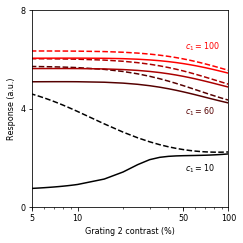

In [637]:
print(GSMdat["FFC_n"].shape)

print(GSMdat["con"])

fig,sub = plt.subplots(1,1,figsize = (onecol,onecol))

II = [20,30,34,38]

for k in range(len(II)):
    sub.semilogx(GSMdat["con"],GSMdat["FFC_n"][1,-2,II[k],:,2,0],color = (float(k)/(len(II)-1),0,0))
    sub.semilogx(GSMdat["con"],GSMdat["FFC_c"][1,-2,II[k],:,2,0],"--",color = (float(k)/(len(II)-1),0,0))

sub.set_xlim([5,100])
sub.set_ylim([0,8])

sub.set_xticks([5,10,50,100])
sub.set_xticklabels(["5","10","50","100"])

sub.set_yticks([0,4,8])
sub.set_yticklabels(["0","4","8"])

sub.set_xlabel("Grating 2 contrast (%)")
sub.set_ylabel("Response (a.u.)")

sub.text(.78,.18,"$c_1 = {}$".format(int(GSMdat["con"][II[0]])),color = (0,0,0),transform = sub.transAxes)
sub.text(.78,.47,"$c_1 = {}$".format(int(GSMdat["con"][II[1]])),color = (1./3,0,0),transform = sub.transAxes)
sub.text(.78,.8,"$c_1 = {}$".format(int(GSMdat["con"][II[-1]])),color = (1,0,0),transform = sub.transAxes)

plt.tight_layout()
plt.savefig("./nMGSM_Figures/carandini_reproduction.pdf", bbox_inches="tight", pad_inches=0)

plt.show()

(600, 6, 10, 10, 50)
(6, 10, 10, 50)


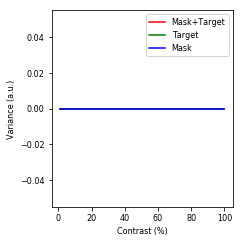

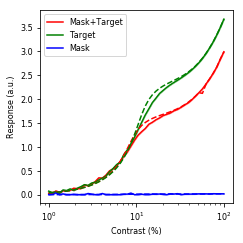

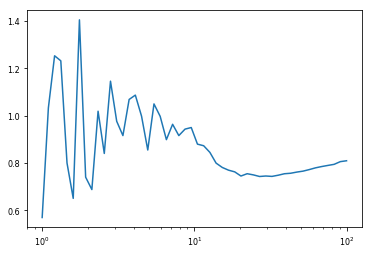

(600, 6, 10, 10, 50)
(10,)
(10, 10, 50)
('II', 1)


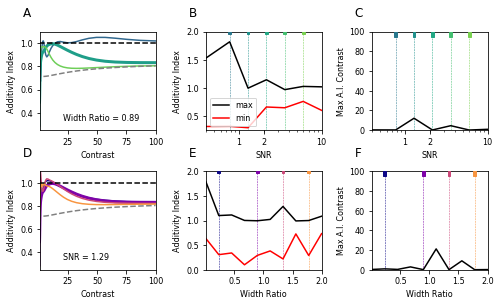

(10,)
(600, 6, 10, 10, 50)
(6, 10, 10, 50)


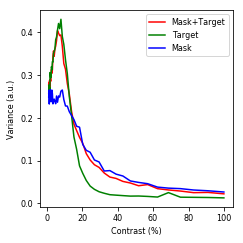

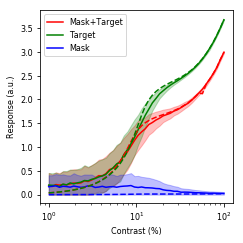

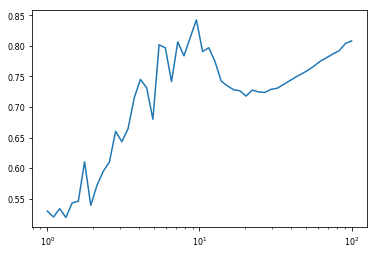

(600, 6, 10, 10, 50)
(10,)
(10, 10, 50)
('II', 0)


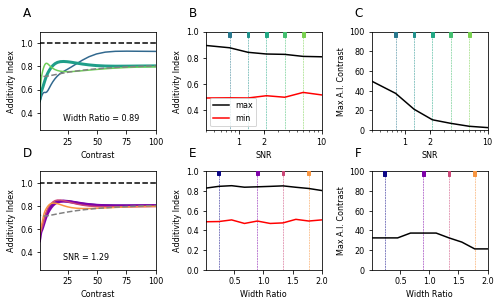

(10,)


In [143]:
import utilities as utils
for voltage in [True,False]:
    def get_trans(curv,con):
        i = np.argmax(curv)

        if curv[i] < 1. or True:
            return con[i]

        while curv[i] > 1 and i < len(curv)-1:
            i += 1

        if i == len(curv)-1:
            return 110
        slope = (curv[i] - curv[i-1])/(con[i] - con[i-1])
        con_t = con[i-1] + (1. - curv[i-1])/slope

        return con_t


    Pdat = np.array(utils.fetch_file("./inference/TA_param_model_stuff.pkl"))
    nPdat = np.array(utils.fetch_file("./inference/more_TA_param_model_stuff.pkl"))
    Pdat = np.concatenate([Pdat,nPdat],axis = 0)

    Pdatn = np.array(utils.fetch_file("./inference/param_model_stuff.pkl"))

    print(Pdat.shape)

    def rect(x,M = False,axis = 0):

        if M:
            return (np.mean(x,axis = axis,keepdims = True) + np.abs(np.mean(x,axis = axis,keepdims = True)))/2
        else:
            return (x + np.abs(x)) / 2


    #Pdat_M = np.array(utils.fetch_file("./inference/param_model_stuff.pkl"))
    from scipy.ndimage.filters import gaussian_filter as gfilt

    Pdat_M = np.array([np.mean(rect(np.array([x[i] for x in Pdat]),M = voltage),axis = 0) for i in range(len(Pdat[0]))])
    Pdat_S = np.array([np.std(rect(np.array([x[i] for x in Pdat]),M = voltage),axis = 0) for i in range(len(Pdat[0]))])

    print(Pdat_M.shape)

    fig,sub = plt.subplots(1,1,figsize = (onecol,onecol))

    sub.plot(np.logspace(0,2,Pdat_M.shape[3]),Pdat_S[0,4,-1],color = "r",label="Mask+Target")

    sub.plot(np.logspace(0,2,Pdat_M.shape[3]),Pdat_S[1,4,-1],color = "g",label = "Target")

    sub.plot(np.logspace(0,2,Pdat_M.shape[3]),Pdat_S[2,4,-1],color = "b",label = "Mask")

    sub.legend()
    sub.set_xlabel("Contrast (%)")
    sub.set_ylabel("Variance (a.u.)")

    plt.tight_layout()
    plt.savefig("./nMGSM_Figures/noisy_param_var_by_contrast_TA_before_{}.pdf".format(voltage), bbox_inches="tight", pad_inches=0)

    plt.show()

    fig,sub = plt.subplots(1,1,figsize = (onecol,onecol))

    sub.plot(np.logspace(0,2,Pdat_M.shape[3]),Pdat_M[0,4,-1],color = "r",label="Mask+Target")
    sub.fill_between(np.logspace(0,2,Pdat_M.shape[3]),np.maximum(Pdat_M[0,4,-1]-Pdat_S[0,3,-1],np.zeros_like(Pdat_M[0,4,-1])),Pdat_M[0,4,-1]+Pdat_S[0,3,-1],color = "r",alpha = .25)

    sub.plot(np.logspace(0,2,Pdat_M.shape[3]),Pdat_M[1,4,-1],color = "g",label = "Target")
    sub.fill_between(np.logspace(0,2,Pdat_M.shape[3]),np.maximum(Pdat_M[1,4,-1] - Pdat_S[1,3,-1],np.zeros_like(Pdat_M[1,4,-1])),Pdat_M[1,4,-1] + Pdat_S[1,3,-1],color = "g",alpha = .25)

    sub.plot(np.logspace(0,2,Pdat_M.shape[3]),Pdat_M[2,4,-1],color = "b",label = "Mask")
    sub.fill_between(np.logspace(0,2,Pdat_M.shape[3]),np.maximum(Pdat_M[2,4,-1] - Pdat_S[2,3,-1],np.zeros_like(Pdat_M[2,4,-1])),Pdat_M[2,4,-1] + Pdat_S[2,3,-1],color = "b",alpha = .25)

    sub.plot(np.logspace(0,2,Pdatn.shape[3]),Pdatn[0,4,-1],"r--")
    sub.plot(np.logspace(0,2,Pdatn.shape[3]),Pdatn[1,4,-1],"g--")
    sub.plot(np.logspace(0,2,Pdatn.shape[3]),Pdatn[2,4,-1],"b--")

    sub.legend()

    sub.set_xscale("log", nonposx='clip')
    sub.set_xlabel("Contrast (%)")
    sub.set_ylabel("Response (a.u.)")

    plt.tight_layout()
    plt.savefig("./nMGSM_Figures/noisy_param_CRF_TA_before_{}.pdf".format(voltage), bbox_inches="tight", pad_inches=0)

    plt.show()

    plt.plot(np.logspace(0,2,Pdat_M.shape[3]),Pdat_M[0,3,-1]/(Pdat_M[1,3,-1]+Pdat_M[2,3,-1]))
    plt.xscale("log", nonposx='clip')
    plt.show()

    Pdat_M = np.apply_along_axis(lambda x:gfilt(x,2),3,np.array([np.mean(rect(np.array([x[i] for x in Pdat]),M = voltage),axis = 0) for i in range(len(Pdat[0]))]))
    #Pdat_M = np.array([np.mean(rect(np.array([x[i] for x in Pdat]),M = voltage),axis = 0) for i in range(len(Pdat[0]))])

    print(Pdat.shape)

    NUM_CURVE = 10
    NUM_CON = 50
    NUM_W = 20

    CMAX = 1.
    CMIN = -2.
    N = 8

    plt.clf()

    kcm = plt.get_cmap('viridis')
    wcm = plt.get_cmap('plasma')

    WW = np.logspace(-1,1,NUM_CURVE)
    wval = np.linspace(.01,2,10)
    con = np.logspace(CMIN,CMAX,NUM_CON)
    con = 100 * con / np.max(con)

    AI = Pdat_M[0]/(Pdat_M[1]+Pdat_M[2])
    nAI = Pdatn[3]/(Pdatn[4]+Pdatn[5])

    print(WW.shape)
    print(AI.shape)

    fig,sub = plt.subplots(2,3,figsize = (twocol,twocol*2/3))

    #sub[0,0].axis("off")
    #sub[0,1].axis("off")
    ##Kvary
    kwi = 4
    wki = 5

    ax = sub[0,0]
    ax.set_prop_cycle("color",[kcm(1.*i/(AI.shape[0]-1)) for i in range(AI.shape[0]-1)])

    for i in range(0,AI.shape[1]-1,1):
        if i == wki:
            ax.plot(con,AI[kwi,i],linewidth=3)
        else:
            ax.plot(con,AI[kwi,i],linewidth = 1.5 if i in [3,5,7] else 0)

    ax.plot(con,np.ones_like(con),"k--")
    ax.plot(con,nAI[kwi,-1],"--",color=(.5,.5,.5))
    ax.set_xlim([1,100])
    ax.set_ylim([.25,1.1])
    ax.set_xlabel("Contrast")
    ax.set_ylabel("Additivity Index")
    ax.text(-.15, 1.15, "A", fontsize=12,transform =ax.transAxes)
    ax.text(.2, .1, "Width Ratio = {}".format(np.round(wval[kwi],2)), fontsize=8,transform =ax.transAxes)

    ##Wvary
    ax = sub[1,0]

    wind = [1,4,6,8]
    ax.set_prop_cycle("color",[wcm(1.*i/len(wind)) for i in range(len(wind))])

    for i in wind:
        if i == kwi:
            ax.plot(con,AI[i,wki],linewidth = 3)
        else:
            ax.plot(con,AI[i,wki])

    ax.plot(con,nAI[0,wki],"--",color=(.5,.5,.5))

    ax.plot(con,np.ones_like(con),"k--")

    ax.set_xlim([1,100])
    ax.set_ylim([.25,1.1])
    ax.set_xlabel("Contrast")
    ax.set_ylabel("Additivity Index")
    ax.text(-.15, 1.15, "D", fontsize=12,transform =ax.transAxes)
    ax.text(.2, .1, "SNR = {}".format(np.round(WW[wki],2)), fontsize=8,transform =ax.transAxes)

    ##K maxmin
    pmax = 2. if voltage else 1

    ax = sub[0,1]
    ctr= np.array([get_trans(AI[kwi,k],con) for k in range(len(WW))])

    ii = get_trans(ctr/100,range(len(ctr)));
    print("II",ii)
    w1 = WW[int(np.floor(ii))]
    w2 = WW[int(np.floor(ii)+1)]
    ww = w1 + (w2-w1)*(ii-np.floor(ii))

    ax.plot([ww,ww],[0,100],"k--",linewidth = 1)
    wtemp = WW
    wtemp[3] = ww
    ax.semilogx(wtemp[3:],[np.max(AI[kwi,k]) for k in range(len(WW))[3:]],"k",label = "max")
    ax.semilogx(wtemp[3:],[np.min(AI[kwi,k]) for k in range(len(WW))[3:]],"r",label = "min")
    ax.legend(loc = "lower left")
    frac = float((float(len(WW)) - 1.)/len(WW))

    for w in range(len(WW))[4:-1]:
    #    ax.add_patch(mpl.patches.FancyArrow(WW[w],.55,0,-.05,width = .05*WW[w],color = kcm(1.*w/(len(WW))),zorder = 100,head_width = 0,head_length=0))
        ax.add_patch(mpl.patches.FancyArrow(WW[w],pmax-.04,0,.04,width = .08*WW[w],color = kcm(1.*w/(len(WW))),zorder = 100,head_width = 0,head_length=0))
        ax.plot([WW[w],WW[w]],[0,2],"--",color = kcm(1.*w/(len(WW))),linewidth = .5,zorder = 0)



    ax.set_xlim([.4,np.max(WW)])
    ax.set_ylim([.25,pmax])
    ax.set_xticks([1,2,10])
    ax.set_xticklabels(["1","2","10"])
    ax.set_xlabel("SNR")
    ax.set_ylabel("Additivity Index")
    ax.text(-.15, 1.15, "B", fontsize=12,transform =ax.transAxes)

    ##K trans
    ax = sub[0,2]
    ctr= np.array([get_trans(AI[kwi,k],con) for k in range(len(WW))])
    ax.semilogx(WW,ctr,"k")

    #ii = get_trans(ctr/100,range(len(ctr)));

    #w1 = WW[int(np.floor(ii))]
    #w2 = WW[int(np.floor(ii)+1)]
    #ww = w1 + (w2-w1)*(ii-np.floor(ii))

    ax.plot([ww,ww],[0,100],"k--",linewidth = 1)

    for w in range(len(WW))[4:-1]:
    #    ax.add_patch(mpl.patches.FancyArrow(WW[w],10,0,-10,width = .05*WW[w],color = kcm(1.*w/(len(WW))),zorder = 100,head_width = 0,head_length=0))
        ax.add_patch(mpl.patches.FancyArrow(WW[w],95,0,5,width = .08*WW[w],color = kcm(1.*w/(len(WW))),zorder = 100,head_width = 0,head_length=0))
        ax.plot([WW[w],WW[w]],[0,100],"--",color = kcm(1.*w/(len(WW))),linewidth = .5,zorder = 0)


    ax.set_xlim([.4,np.max(WW)])
    ax.set_xticks([1,2,10])
    ax.set_xticklabels(["1","2","10"])
    ax.set_ylim([0,100])
    ax.set_xlabel("SNR")
    ax.set_ylabel("Max A.I. Contrast")
    ax.text(-.15, 1.15, "C", fontsize=12,transform =ax.transAxes)

    ##W maxmin
    ax = sub[1,1]
    ax.plot(wval,[np.max(AI[w,wki]) for w in range(len(wval))],"k")
    ax.plot(wval,[np.min(AI[w,wki]) for w in range(len(wval))],"r")

    for w in range(len(wind)):
    #    ax.add_patch(mpl.patches.FancyArrow(wval[wind[w]],.55,0,-.05,width = .05,color = wcm(1.*w/len(wind)),zorder = 100,head_width = 0,head_length=0))
        ax.add_patch(mpl.patches.FancyArrow(wval[wind[w]],pmax - .04,0,.04,width = .05,color = wcm(1.*w/len(wind)),zorder = 100,head_width = 0,head_length=0))
        ax.plot([wval[wind[w]],wval[wind[w]]],[0,2],"--",color = wcm(1.*w/len(wind)),linewidth = .5,zorder = 0)

    ax.set_xlim([np.min(wval),np.max(wval)])
    ax.set_ylim([0,pmax])
    ax.set_xlabel("Width Ratio")
    ax.set_ylabel("Additivity Index")
    ax.text(-.15, 1.15, "E", fontsize=12,transform =ax.transAxes)

    ##W trans
    ax = sub[1,2]

    ax.plot(wval,[get_trans(AI[w,4],con) for w in range(len(wval))],"k")


    for w in range(len(wind)):
    #    ax.add_patch(mpl.patches.FancyArrow(wval[wind[w]],10,0,-10,width = .05,color = wcm(1.*w/len(wind)),zorder = 100,head_width = 0,head_length=0))
        ax.add_patch(mpl.patches.FancyArrow(wval[wind[w]],95,0,5,width = .05,color = wcm(1.*w/len(wind)),zorder = 100,head_width = 0,head_length=0))
        ax.plot([wval[wind[w]],wval[wind[w]]],[0,100],"--",color = wcm(1.*w/len(wind)),linewidth = .5,zorder = 0)


    ax.set_xlim([np.min(wval),np.max(wval)])
    ax.set_ylim([0,100])
    ax.set_xlabel("Width Ratio")
    ax.set_ylabel("Max A.I. Contrast")

    ax.text(-.15, 1.15, "F", fontsize=12,transform =ax.transAxes)

    plt.tight_layout()

    plt.savefig("./nMGSM_Figures/noisy_param_fig_TA_before_{}.pdf".format(voltage), bbox_inches="tight", pad_inches=0)
    plt.show()

    print(WW.shape)

(383, 6, 10, 10, 50)
(6, 10, 10, 50)


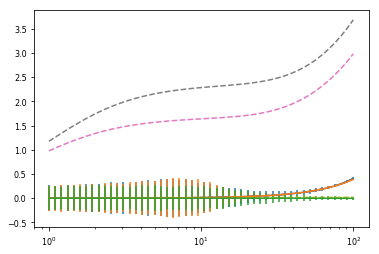

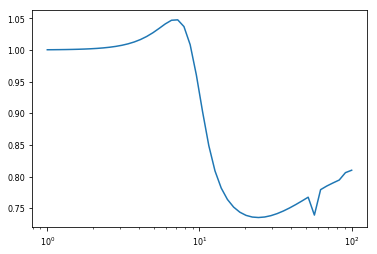

(383, 6, 10, 10, 50)
(10,)
(10, 10, 50)
('II', 0)


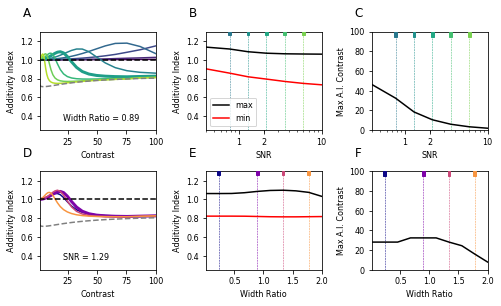

(10,)


In [463]:
import utilities as utils

def get_trans(curv,con):
    i = np.argmax(curv)

    if curv[i] < 1. or True:
        return con[i]
    
    while curv[i] > 1 and i < len(curv)-1:
        i += 1

    if i == len(curv)-1:
        return 110
    slope = (curv[i] - curv[i-1])/(con[i] - con[i-1])
    con_t = con[i-1] + (1. - curv[i-1])/slope

    return con_t


Pdat = np.array(utils.fetch_file("./inference/TA_param_model_stuff.pkl"))
nPdat = np.array(utils.fetch_file("./inference/more_TA_param_model_stuff.pkl"))
Pdat = np.concatenate([Pdat,nPdat],axis = 0)

Pdatn = np.array(utils.fetch_file("./inference/param_model_stuff.pkl"))

print(Pdat.shape)

def rect(x):
    return (x + np.abs(x))/2


Pdat_M = np.array(utils.fetch_file("./inference/param_model_stuff.pkl"))
from scipy.ndimage.filters import gaussian_filter as gfilt

#Pdat_M = np.apply_along_axis(lambda x:gfilt(x,2),3,np.array([np.mean(rect(np.array([x[i] for x in Pdat])),axis = 0) for i in range(len(Pdat[0]))]))
#Pdat_M = np.array([np.mean(rect(np.array([x[i] for x in Pdat])),axis = 0) for i in range(len(Pdat[0]))])
Pdat_S = np.array([np.std(rect(np.array([x[i] for x in Pdat])),axis = 0) for i in range(len(Pdat[0]))])
    
print(Pdat_M.shape)

plt.errorbar(np.logspace(0,2,Pdat_M.shape[3]),Pdat_M[0,6,1],yerr = Pdat_S[0,3,-1])
plt.errorbar(np.logspace(0,2,Pdat_M.shape[3]),Pdat_M[1,6,1],yerr = Pdat_S[1,3,-1])
plt.errorbar(np.logspace(0,2,Pdat_M.shape[3]),Pdat_M[2,6,1],yerr = Pdat_S[2,3,-1])

plt.plot(np.logspace(0,2,Pdatn.shape[3]),Pdatn[0,6,1],"--")
plt.plot(np.logspace(0,2,Pdatn.shape[3]),Pdatn[1,6,1],"--")
plt.plot(np.logspace(0,2,Pdatn.shape[3]),Pdatn[2,6,1],"--")

plt.plot(np.logspace(0,2,Pdatn.shape[3]),Pdatn[3,6,1],"--")
plt.plot(np.logspace(0,2,Pdatn.shape[3]),Pdatn[4,6,1],"--")
plt.plot(np.logspace(0,2,Pdatn.shape[3]),Pdatn[5,6,1],"--")
plt.xscale("log", nonposx='clip')

#plt.xlim([1,2])
#plt.ylim([-.1,.5])
plt.show()

plt.plot(np.logspace(0,2,Pdat_M.shape[3]),Pdat_M[0,3,-1]/(Pdat_M[1,3,-1]+Pdat_M[2,3,-1]))
plt.xscale("log", nonposx='clip')
plt.show()

print(Pdat.shape)

NUM_CURVE = 10
NUM_CON = 50
NUM_W = 20

CMAX = 1.
CMIN = -2.
N = 8

plt.clf()

kcm = plt.get_cmap('viridis')
wcm = plt.get_cmap('plasma')

WW = np.logspace(-1,1,NUM_CURVE)
wval = np.linspace(.01,2,10)
con = np.logspace(CMIN,CMAX,NUM_CON)
con = 100 * con / np.max(con)

AI = Pdat_M[0]/(Pdat_M[1]+Pdat_M[2])
nAI = Pdatn[3]/(Pdatn[4]+Pdatn[5])

print(WW.shape)
print(AI.shape)

fig,sub = plt.subplots(2,3,figsize = (twocol,twocol*2/3))

#sub[0,0].axis("off")
#sub[0,1].axis("off")
##Kvary
kwi = 4
wki = 5

ax = sub[0,0]
ax.set_prop_cycle("color",[kcm(1.*i/(AI.shape[0]-1)) for i in range(AI.shape[0]-1)])

for i in range(0,AI.shape[1]-1,1):
    if i == wki:
        ax.plot(con,AI[kwi,i],linewidth=3)
    else:
        ax.plot(con,AI[kwi,i],linewidth = 1.5)

ax.plot(con,np.ones_like(con),"k--")
ax.plot(con,nAI[kwi,-1],"--",color=(.5,.5,.5))
ax.set_xlim([1,100])
ax.set_ylim([.25,1.3])
ax.set_xlabel("Contrast")
ax.set_ylabel("Additivity Index")
ax.text(-.15, 1.15, "A", fontsize=12,transform =ax.transAxes)
ax.text(.2, .1, "Width Ratio = {}".format(np.round(wval[kwi],2)), fontsize=8,transform =ax.transAxes)

##Wvary
ax = sub[1,0]

wind = [1,4,6,8]
ax.set_prop_cycle("color",[wcm(1.*i/len(wind)) for i in range(len(wind))])

for i in wind:
    if i == kwi:
        ax.plot(con,AI[i,wki],linewidth = 3)
    else:
        ax.plot(con,AI[i,wki])
    
ax.plot(con,nAI[0,wki],"--",color=(.5,.5,.5))

ax.plot(con,np.ones_like(con),"k--")
    
ax.set_xlim([1,100])
ax.set_ylim([.25,1.3])
ax.set_xlabel("Contrast")
ax.set_ylabel("Additivity Index")
ax.text(-.15, 1.15, "D", fontsize=12,transform =ax.transAxes)
ax.text(.2, .1, "SNR = {}".format(np.round(WW[wki],2)), fontsize=8,transform =ax.transAxes)

##K maxmin
pmax = 1.3

ax = sub[0,1]
ctr= np.array([get_trans(AI[kwi,k],con) for k in range(len(WW))])

ii = get_trans(ctr/100,range(len(ctr)));
print("II",ii)
w1 = WW[int(np.floor(ii))]
w2 = WW[int(np.floor(ii)+1)]
ww = w1 + (w2-w1)*(ii-np.floor(ii))

ax.plot([ww,ww],[0,100],"k--",linewidth = 1)
wtemp = WW
wtemp[3] = ww
ax.semilogx(wtemp[3:],[np.max(AI[kwi,k]) for k in range(len(WW))[3:]],"k",label = "max")
ax.semilogx(wtemp[3:],[np.min(AI[kwi,k]) for k in range(len(WW))[3:]],"r",label = "min")
ax.legend(loc = "lower left")
frac = float((float(len(WW)) - 1.)/len(WW))

for w in range(len(WW))[4:-1]:
#    ax.add_patch(mpl.patches.FancyArrow(WW[w],.55,0,-.05,width = .05*WW[w],color = kcm(1.*w/(len(WW))),zorder = 100,head_width = 0,head_length=0))
    ax.add_patch(mpl.patches.FancyArrow(WW[w],pmax-.04,0,.04,width = .08*WW[w],color = kcm(1.*w/(len(WW))),zorder = 100,head_width = 0,head_length=0))
    ax.plot([WW[w],WW[w]],[0,2],"--",color = kcm(1.*w/(len(WW))),linewidth = .5,zorder = 0)
    


ax.set_xlim([.4,np.max(WW)])
ax.set_ylim([.25,pmax])
ax.set_xticks([1,2,10])
ax.set_xticklabels(["1","2","10"])
ax.set_xlabel("SNR")
ax.set_ylabel("Additivity Index")
ax.text(-.15, 1.15, "B", fontsize=12,transform =ax.transAxes)

##K trans
ax = sub[0,2]
ctr= np.array([get_trans(AI[kwi,k],con) for k in range(len(WW))])
ax.semilogx(WW,ctr,"k")

#ii = get_trans(ctr/100,range(len(ctr)));

#w1 = WW[int(np.floor(ii))]
#w2 = WW[int(np.floor(ii)+1)]
#ww = w1 + (w2-w1)*(ii-np.floor(ii))

ax.plot([ww,ww],[0,100],"k--",linewidth = 1)

for w in range(len(WW))[4:-1]:
#    ax.add_patch(mpl.patches.FancyArrow(WW[w],10,0,-10,width = .05*WW[w],color = kcm(1.*w/(len(WW))),zorder = 100,head_width = 0,head_length=0))
    ax.add_patch(mpl.patches.FancyArrow(WW[w],95,0,5,width = .08*WW[w],color = kcm(1.*w/(len(WW))),zorder = 100,head_width = 0,head_length=0))
    ax.plot([WW[w],WW[w]],[0,100],"--",color = kcm(1.*w/(len(WW))),linewidth = .5,zorder = 0)


ax.set_xlim([.4,np.max(WW)])
ax.set_xticks([1,2,10])
ax.set_xticklabels(["1","2","10"])
ax.set_ylim([0,100])
ax.set_xlabel("SNR")
ax.set_ylabel("Max A.I. Contrast")
ax.text(-.15, 1.15, "C", fontsize=12,transform =ax.transAxes)

##W maxmin
ax = sub[1,1]
ax.plot(wval,[np.max(AI[w,wki]) for w in range(len(wval))],"k")
ax.plot(wval,[np.min(AI[w,wki]) for w in range(len(wval))],"r")

for w in range(len(wind)):
#    ax.add_patch(mpl.patches.FancyArrow(wval[wind[w]],.55,0,-.05,width = .05,color = wcm(1.*w/len(wind)),zorder = 100,head_width = 0,head_length=0))
    ax.add_patch(mpl.patches.FancyArrow(wval[wind[w]],pmax - .04,0,.04,width = .05,color = wcm(1.*w/len(wind)),zorder = 100,head_width = 0,head_length=0))
    ax.plot([wval[wind[w]],wval[wind[w]]],[0,2],"--",color = wcm(1.*w/len(wind)),linewidth = .5,zorder = 0)
    
ax.set_xlim([np.min(wval),np.max(wval)])
ax.set_ylim([.25,pmax])
ax.set_xlabel("Width Ratio")
ax.set_ylabel("Additivity Index")
ax.text(-.15, 1.15, "E", fontsize=12,transform =ax.transAxes)

##W trans
ax = sub[1,2]

ax.plot(wval,[get_trans(AI[w,4],con) for w in range(len(wval))],"k")


for w in range(len(wind)):
#    ax.add_patch(mpl.patches.FancyArrow(wval[wind[w]],10,0,-10,width = .05,color = wcm(1.*w/len(wind)),zorder = 100,head_width = 0,head_length=0))
    ax.add_patch(mpl.patches.FancyArrow(wval[wind[w]],95,0,5,width = .05,color = wcm(1.*w/len(wind)),zorder = 100,head_width = 0,head_length=0))
    ax.plot([wval[wind[w]],wval[wind[w]]],[0,100],"--",color = wcm(1.*w/len(wind)),linewidth = .5,zorder = 0)
    

ax.set_xlim([np.min(wval),np.max(wval)])
ax.set_ylim([0,100])
ax.set_xlabel("Width Ratio")
ax.set_ylabel("Max A.I. Contrast")

ax.text(-.15, 1.15, "F", fontsize=12,transform =ax.transAxes)

plt.tight_layout()

plt.savefig("./nMGSM_Figures/param_fig.pdf", bbox_inches="tight", pad_inches=0)
plt.show()

print(WW.shape)

In [282]:
import utilities as utils

D2dat = utils.fetch_file("./inference/2Dmodel_stuff.pkl")

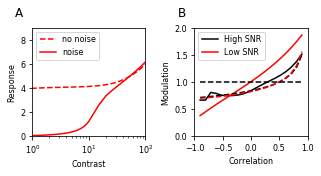

In [275]:
plt.clf()
fig,sub = plt.subplots(1,2,figsize = (onep5,onep5*.5))
c = np.linspace(-.9,.9,20)

#sub[0,0].axis("off")
#sub[0,1].axis("off")

ax = sub[1]
ax.plot(c,D2dat[0],"k",label="High SNR")
ax.plot(c,D2dat[1],"r",label="Low SNR")
ax.plot(c,D2dat[2],"k--")
ax.plot(c,D2dat[3],"r--")
ax.plot(c,np.ones_like(c),"k--")
ax.set_xlim([-1,1])
ax.set_ylim([0,2])
ax.set_xlabel("Correlation")
ax.set_ylabel("Modulation")
ax.legend(loc = "upper left")
ax.text(-.15, 1.1, "B", fontsize=12, transform=ax.transAxes)

ax = sub[0]
ax.semilogx(dat["con"][1:],dat["SS_c"][3,2,1:,0,0],"r--",label = "no noise")

ax.semilogx(dat["con"][1:],dat["SS_n"][3,2,1:,0,0],"r",label = "noise")
ax.set_xlim([1,100])
ax.set_ylim([0,9])
ax.set_xlabel("Contrast")
ax.set_ylabel("Response")
ax.legend(loc = "upper left")
ax.text(-.15, 1.1, "A", fontsize=12, transform=ax.transAxes)
plt.tight_layout()

plt.savefig("./nMGSM_Figures/2Dmodel.pdf",bbox_inches="tight")
plt.show()

In [190]:
R=np.array(utils.fetch_file("./model_files/MGSM_model_file_3/responses_0.5_2_1.0_surround_suppression_1.0.pkl"))
print(R.shape)
R = np.mean(R[:,:,(0,1)],axis = (0))
R = np.reshape(R,[50,2,2])
print(R.shape)
print(R[0,0])

print(R[:,0,0])

(1, 100, 2)
(50, 2, 2)
[ 0.07282882 -0.01297821]
[ 0.07282882  0.08006607  0.0880389   0.09682191  0.10650886  0.11719636
  0.12899893  0.14205335  0.15650923  0.17254281  0.19036504  0.21022305
  0.23242632  0.25734115  0.28542633  0.31728702  0.35368497  0.39565725
  0.44464727  0.50268333  0.57279215  0.65977211  0.77136172  0.92108112
  1.13256768  1.44058117  1.85596692  2.30755739  2.71237509  2.95869219
  2.75330411  2.93322076  3.57985425  4.19765669  4.73356537  5.1941781
  5.58822884  5.92491394  6.19690873  6.29157779  6.40616009  6.59545108
  6.79140956  6.99051357  7.19308725  7.40030159  7.61329801  7.83313557
  8.06101362  8.29817724]


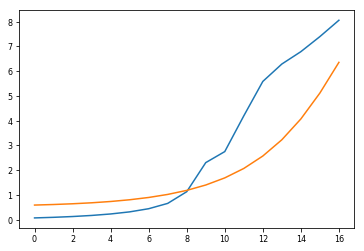

In [196]:
plt.plot(R[::3,0,0])
plt.plot(R[::3,1,0])
plt.show()

In [194]:
400*100/60/60

11